In [232]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
from scipy import signal

def correct_lo_phase(array):
    
    lo_data = array[:, :, :, 0]
    angles = np.angle(lo_data)
    zero_phases = angles[:, :, 0]
    phase_shifts = np.exp(-1j * 1 * (angles - zero_phases[:, :, np.newaxis]))
    shifted_array = phase_shifts[:, :, :, np.newaxis] * array
    
    return shifted_array

def model_based_phase_correction(data_phases, model_phases):
    
    for i in range(model_phases.size):
        if (model_phases[i] - data_phases[i])> np.pi:
            data_phases[i] += round((model_phases[i] - data_phases[i]) / (2*np.pi), 0) * 2 * np.pi
        elif (model_phases[i] - data_phases[i])< -np.pi:
            data_phases[i] += round((model_phases[i] - data_phases[i]) / (2*np.pi), 0) * 2 * np.pi
            
    return data_phases

def phase_offset_correction(data_phases, model_phases, find_peak_height=2., find_peak_prom=0.2):
    
    phase_diff = data_phases-model_phases
    phase_diff = np.convolve(phase_diff, np.ones(5)/5, mode='valid')
    phase_diff_diff = np.convolve(np.diff(phase_diff), np.ones(3), mode='same')
    peaks = signal.find_peaks(abs(phase_diff_diff), height=find_peak_height, prominence=find_peak_prom)
    
    peak_inds = peaks[0]
    phase_correction = np.zeros(phases.size)
    for j in range(peak_inds.size):
        phase_correction[peak_inds[j]+3:] += -1*2*np.pi * np.sign(phase_diff_diff[peak_inds[j]])
        
    return phase_correction
    
            

def TestPhaseModel(coordinates, roll=0):

    ant_angles = np.arange(0, 120, 1) * 3
    r_array = 0.1
    wavelength = 3e8 / 25.86e9

    x_array = r_array * np.cos(np.radians(ant_angles))
    y_array = r_array * np.sin(np.radians(ant_angles))
    x_coord, y_coord = coordinates[:, 0], coordinates[:, 1]

    d = np.sqrt(
        (x_array[:, np.newaxis] - x_coord[np.newaxis, :]) ** 2
        + (y_array[:, np.newaxis] - y_coord[np.newaxis, :]) ** 2
        )
    arctan = np.arctan2(
        y_array[:, np.newaxis] - y_coord[np.newaxis, :],
        x_array[:, np.newaxis] - x_coord[np.newaxis, :]
        )

    spatial = 2*np.pi * d / wavelength
    phase = np.unwrap(np.roll(spatial+arctan, roll, axis=0), axis=0)
    phase -= phase[0, :][np.newaxis, :]
    
    return -phase


In [14]:
file_repo = Path.home()/'iCloud'/'penn_state_synca_data'/'dig'/'synca1_5slot_scan'
file_name = '221230_synca1_5slot_scan_fft.npy'

In [268]:
data = np.load(file_repo/file_name)
#data = data[:, :, 0:119, :]
#data[:, :, 62:, :] = np.flip(data[:, :, 62:, :], axis=2)
data = np.roll(data, 60, axis=2)
corrected_data = correct_lo_phase(data)
#corrected_data = data
print(corrected_data.shape)

(14, 10, 120, 2)


In [269]:
print(abs(corrected_data[0,0, :, 1]))

[3.13894261e-05 3.13043738e-05 3.06478414e-05 3.23250125e-05
 3.49819276e-05 3.51590360e-05 3.44880682e-05 1.50395767e-05
 3.13367494e-05 3.00291050e-05 3.15876545e-05 3.09009568e-05
 2.78984041e-05 2.46905981e-05 2.03928769e-05 1.88623716e-05
 2.10787023e-05 2.93897788e-05 3.92222508e-05 4.89706027e-05
 5.63045732e-05 5.96403014e-05 6.31850033e-05 6.49694296e-05
 6.55826293e-05 6.37492290e-05 5.74049711e-05 4.59513661e-05
 3.45206855e-05 4.09967623e-05 5.50681571e-05 6.22764354e-05
 6.06300955e-05 5.55698190e-05 4.86574565e-05 4.48304526e-05
 3.95189947e-05 3.35482268e-05 2.33253625e-05 1.50190969e-05
 2.98963075e-05 3.94918526e-05 4.57706992e-05 4.69136533e-05
 4.23575336e-05 3.68764306e-05 3.28398472e-05 2.92040583e-05
 2.74523874e-05 2.57450390e-05 2.68853584e-05 2.72932017e-05
 2.89683751e-05 3.11207784e-05 1.91148269e-06 3.97132808e-05
 4.56375645e-05 5.29414535e-05 5.70606387e-05 6.00817053e-05
 6.22015512e-05 5.91315535e-05 5.59575569e-05 4.90891797e-05
 4.37864739e-05 3.737444

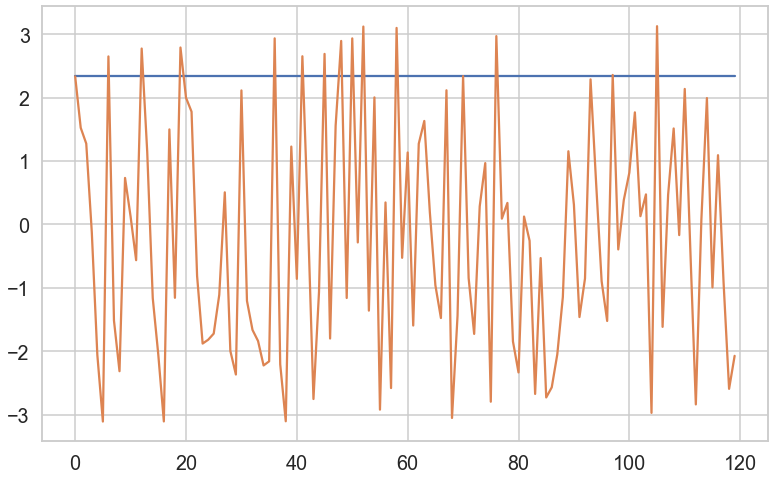

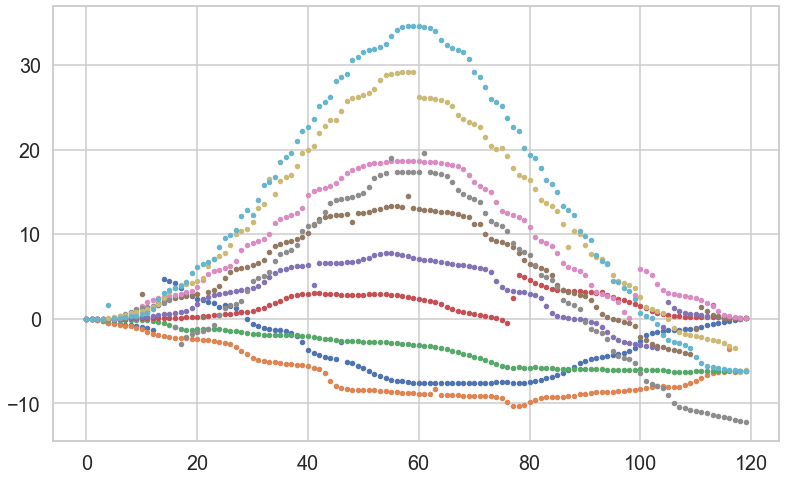

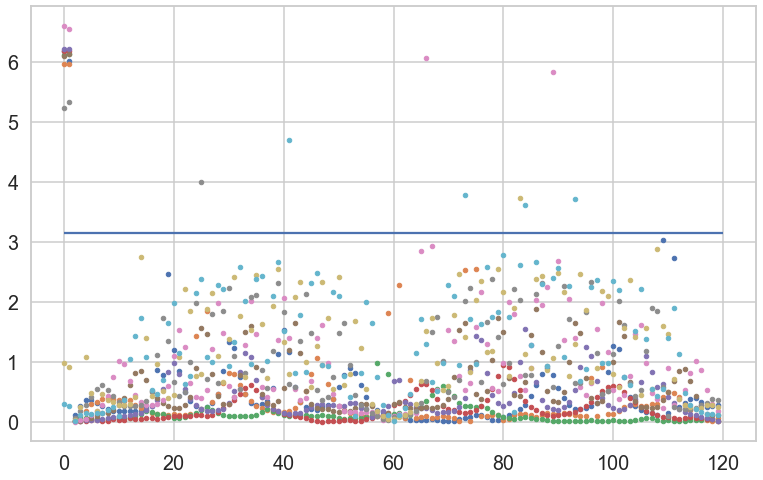

In [270]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(np.angle(corrected_data[3,0,:,0]))
ax.plot(np.angle(data[3,0,:,0]))

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
test_ind = 1
#ax.plot(np.unwrap(np.angle(corrected_data[test_ind,9,:,1]) - np.angle(corrected_data[test_ind,9,0,1])), '.')
for i in range(10):
    ax.plot(np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1])),'.')

    
#sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
#fig = plt.figure(figsize=(13, 8))
#ax = fig.add_subplot(1,1,1)
#test_ind = 3
#ax.plot(np.unwrap(np.angle(corrected_data[test_ind,9,:,1]) - np.angle(corrected_data[test_ind,9,0,1])), '.')
#for i in range(10):
    
#    phase_curve = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
#    discontinuity = np.zeros(phase_curve.size)
#    for j in range(phase_curve.size):
#        discontinuity[j] = phase_curve[j]-phase_curve[j-1]
        
#    ax.plot(discontinuity, '.')

    

sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
test_ind = 3
#ax.plot(np.unwrap(np.angle(corrected_data[test_ind,9,:,1]) - np.angle(corrected_data[test_ind,9,0,1])), '.')
for i in range(10):
    
    phase_curve = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    discontinuity = np.zeros(phase_curve.size)
    discontinuity_sum = np.zeros(phase_curve.size)
    
    for j in range(phase_curve.size):
        discontinuity[j] = phase_curve[j]-phase_curve[j-1]
    for j in range(phase_curve.size):
        discontinuity_sum[j] = discontinuity[j]+discontinuity[j-1]
        
    ax.plot(abs(discontinuity_sum), '.')
    
ax.hlines(np.pi, xmin=0, xmax=120)


# fix phase jumps

In [271]:
y = np.zeros(11)
x_start = 0.010 + -0.00
x = -np.arange(0, 55, 5) * 0.001
x = x + x_start

coordinates = np.array([x, y]).T

model_phases = TestPhaseModel(coordinates, roll=0)
print(model_phases.shape)

(120, 11)


# Compare unwraped phases to model

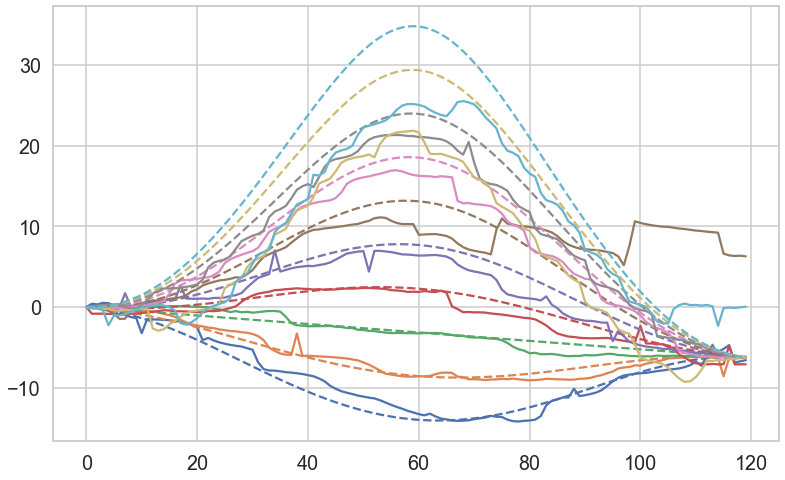

In [272]:
test_ind = 12
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    ax.plot(model_phases[:, i], color=clist[i], ls='--')

    ax.plot(phases, color=clist[i], )
    #ax.plot(phases)

# Visualize phase differences from model

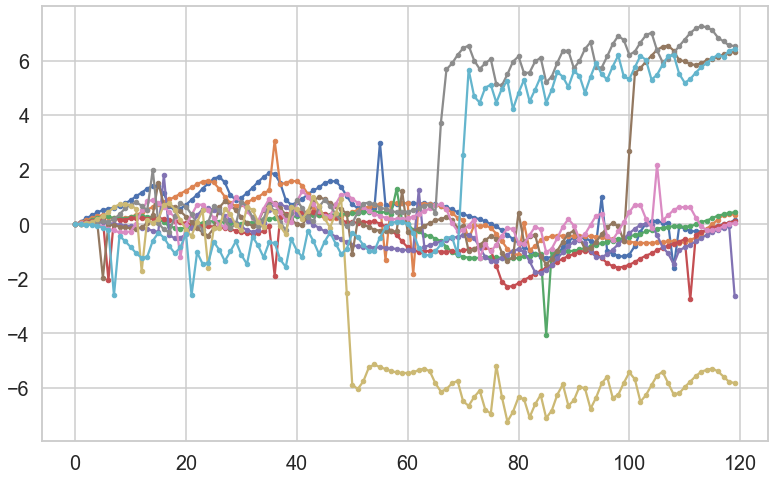

In [149]:
test_ind = 6
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    ax.plot((phases-model_phases[:, i]), color=clist[i], marker='.', ls='-')


# develop a function to correct 2 pi phase offsets

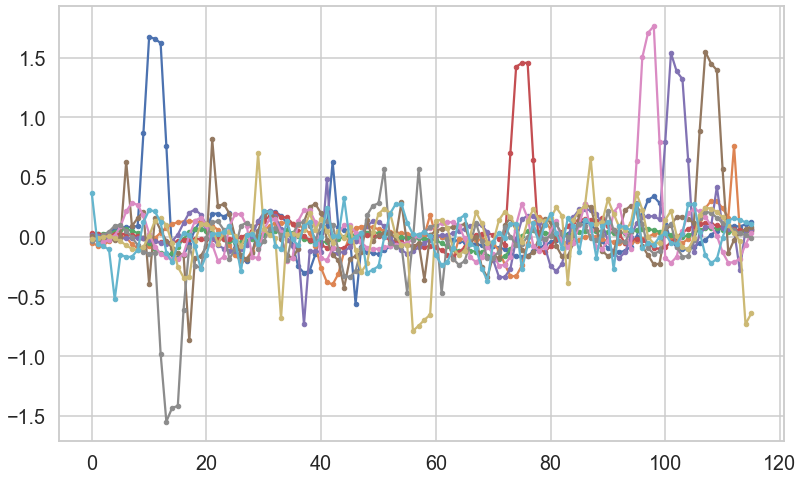

In [136]:
test_ind = 4
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    phase_diff = phases-model_phases[:, i]
    phase_diff = np.convolve(phase_diff, np.ones(4)/4, mode='valid')
    #for j in range(phase_diff.size):
    #    if phase_diff[j] > np.pi:
    #        phase_diff[j]-=2*np.pi
    #    elif phase_diff[j] < -np.pi:
    #        phase_diff[j]+=2*np.pi
    ax.plot(np.diff(phase_diff), color=clist[i], marker='.', ls='-')

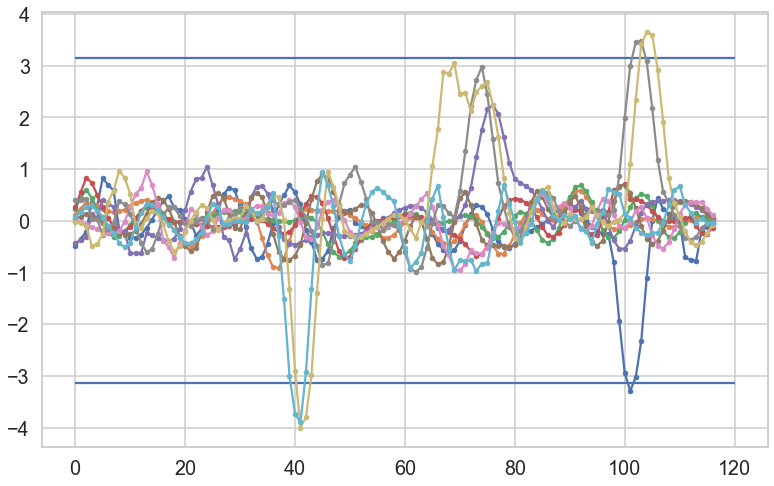

In [194]:
test_ind = 8
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    phase_diff = phases-model_phases[:, i]
    phase_diff = np.convolve(phase_diff, np.ones(5)/5, mode='valid')
    #for j in range(phase_diff.size):
    #    if phase_diff[j] > np.pi:
    #        phase_diff[j]-=2*np.pi
    #    elif phase_diff[j] < -np.pi:
    #        phase_diff[j]+=2*np.pi
    ax.plot(np.convolve(np.diff(phase_diff), np.ones(3),), color=clist[i], marker='.', ls='-')
    
ax.hlines([np.pi, -np.pi], xmin=0, xmax=120)

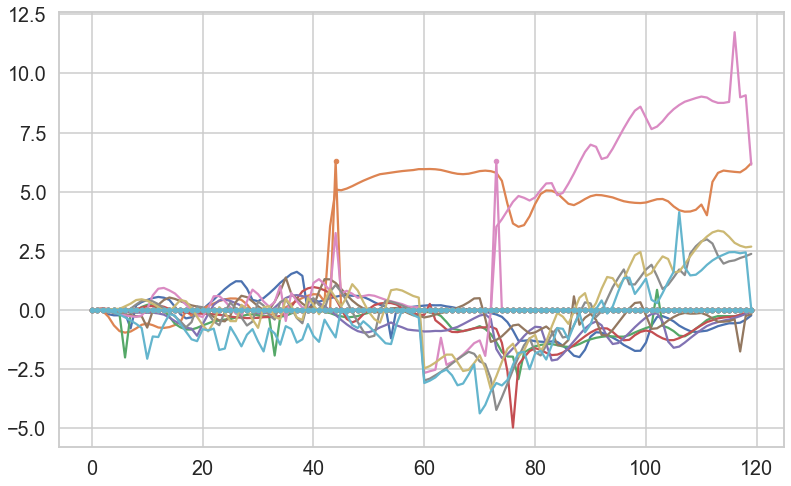

In [218]:
test_ind = 0
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    phase_diff = phases-model_phases[:, i]
    phase_diff = np.convolve(phase_diff, np.ones(5)/5, mode='valid')
    phase_diff_diff = np.convolve(np.diff(phase_diff), np.ones(3), mode='same')
    peaks = signal.find_peaks(abs(phase_diff_diff), height=2., prominence=0.2)
    
    peak_inds = peaks[0]
    phase_correction = np.zeros(phases.size)
    for j in range(peak_inds.size):
        phase_correction[peak_inds[j]+3] = 2*np.pi * np.sign(phase_diff_diff[peak_inds[j]])
    #for j in range(phase_diff.size):
    #    if phase_diff[j] > np.pi:
    #        phase_diff[j]-=2*np.pi
    #    elif phase_diff[j] < -np.pi:
    #        phase_diff[j]+=2*np.pi
    ax.plot(phase_correction, color=clist[i], marker='.', ls='-')
    ax.plot(phases-model_phases[:, i], color=clist[i])
    
#ax.hlines([np.pi, -np.pi], xmin=0, xmax=120)

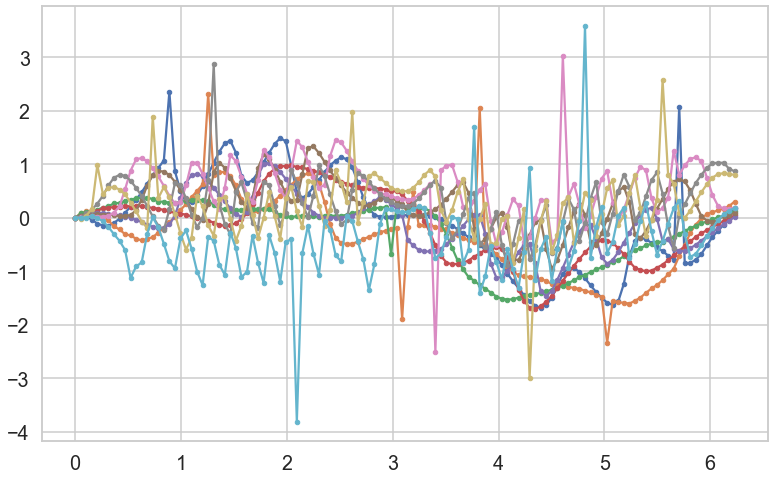

In [282]:
test_ind = 3
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    phases = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    phase_diff = phases-model_phases[:, i]
    phase_diff = np.convolve(phase_diff, np.ones(5)/5, mode='valid')
    phase_diff_diff = np.convolve(np.diff(phase_diff), np.ones(3), mode='same')
    peaks = signal.find_peaks(abs(phase_diff_diff), height=2., prominence=0.2)
    
    peak_inds = peaks[0]
    phase_correction = np.zeros(phases.size)
    for j in range(peak_inds.size):
        phase_correction[peak_inds[j]+3:] += -1*2*np.pi * np.sign(phase_diff_diff[peak_inds[j]])
    #for j in range(phase_diff.size):
    #    if phase_diff[j] > np.pi:
    #        phase_diff[j]-=2*np.pi
    #    elif phase_diff[j] < -np.pi:
    #        phase_diff[j]+=2*np.pi
    #ax.plot(phase_correction, color=clist[i], marker='.', ls='-')
    plot_trace = phases-model_phases[:, i]+phase_correction
    if abs(plot_trace[1]-plot_trace[0])>1:
        plot_trace -= plot_trace[1]
    ax.plot(np.linspace(0, np.radians(357), 120), plot_trace, color=clist[i], marker='.')
    
#ax.hlines([np.pi, -np.pi], xmin=0, xmax=120)

# Apply phase corrections, compare to model

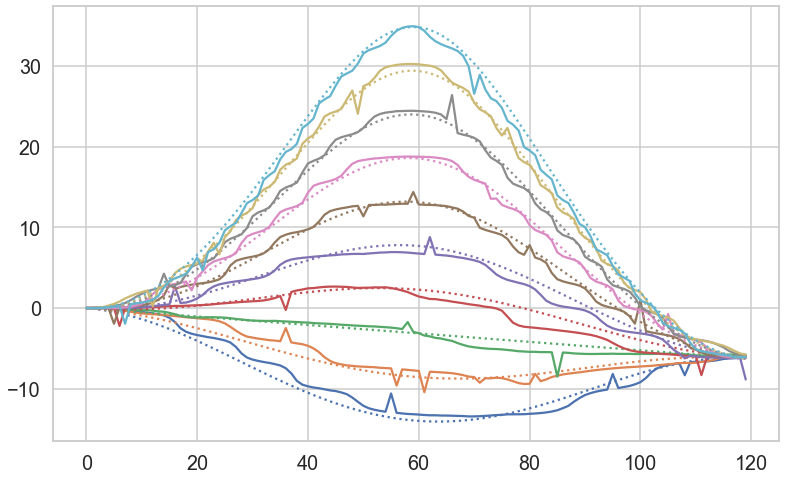

In [281]:
corrected_lo_and_phase_jump_data = np.zeros((14, 10, 120), dtype=np.complex128)
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
test_ind = 6
for i in range(10):
        
    phase_data = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    phase_correction = phase_offset_correction(phase_data, model_phases[:, i])
    plot_trace = phase_data + phase_correction
    if abs(plot_trace[1]-plot_trace[0])>1:
        plot_trace -= plot_trace[1]
    ax.plot(plot_trace, color=clist[i])
    ax.plot(model_phases[:, i], color=clist[i], ls=':')

In [243]:
file_name = '230102_synca1_5slot_scan_fft_corrected_phases.npy'
np.save(file_repo/file_name, corrected_lo_and_phase_jump_data)

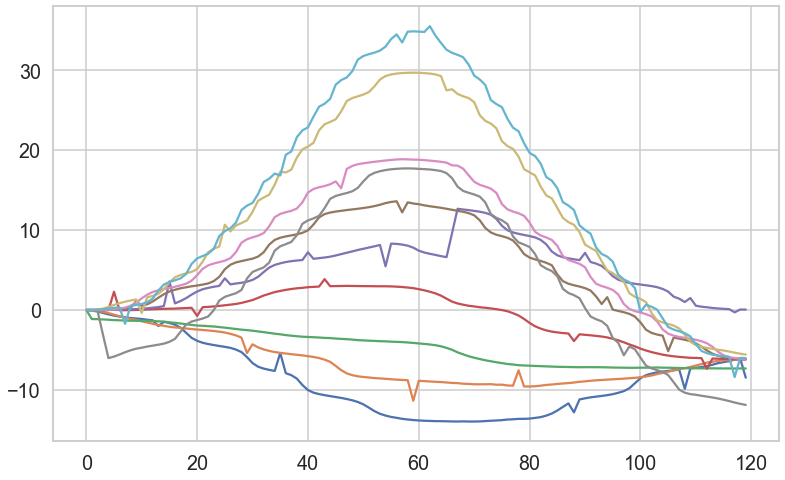

In [244]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

test_ind = 4
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    
    ax.plot(np.unwrap(np.angle(corrected_lo_and_phase_jump_data[test_ind, i, :])))

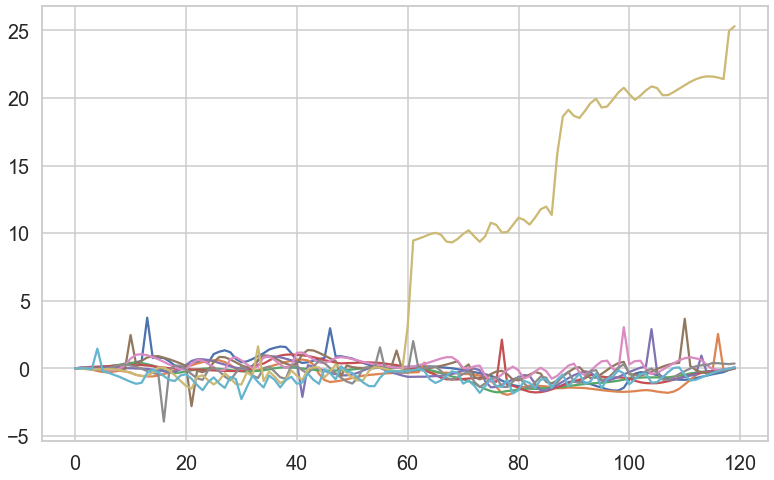

In [247]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

test_ind = 1
clist = sns.color_palette('deep', n_colors=12)

for i in range(10):
    #ax.plot(model_phases[:, i], color=clist[i], marker='None', ls='-')
    
    data_phase = np.unwrap(np.angle(corrected_data[test_ind,i,:,1]) - np.angle(corrected_data[test_ind,i,0,1]))
    diff1 = []
    diff2 = []
    for j in range(data_phase.size-2):
        diff1.append(data_phase[j+2]-data_phase[j+1])
        diff2.append(data_phase[j+2]-data_phase[j])
    
    diff1 = np.array(diff1)
    diff2 = np.array(diff2)
    phase_corrections = np.zeros(data_phase.size)
    for j in range(diff2.size):
        if diff2[j] > 4:
            phase_corrections[j+2:] -= 2*np.pi
        elif diff2[j] < -3:
            phase_corrections[j+2:] += 2*np.pi
            
    data_phase = data_phase+phase_corrections
    ax.plot(data_phase - model_phases[:, i], color=clist[i], ls='-', marker='None')
    